# (US Flight Performance)
## by (Mohamed Abdrabbou)

## Investigation Overview

>Investigate deeply factors behind flight delays taking into consideration carriers performance.

## Dataset Overview

> This dataset reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays,
from 1987 to 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df_total=pd.read_csv('2008.csv')

#df_8=pd.read_csv('2008.csv')
#df_7=pd.read_csv('2007.csv')
#df_6=pd.read_csv('2006.csv')
#df_total = df_6.append([df_7,df_8])



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Cancellation events for each month)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

Text(0, 0.5, 'Count')

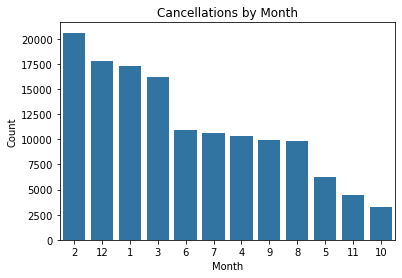

In [4]:
#extracting subset with only cancellation data
df_Cancel=df_total.query('CancellationCode in ["A","B","C","D"]')

g_color = sb.color_palette()[0]
Month_order = df_Cancel.Month.value_counts()
sb.countplot(data = df_Cancel, x='Month', color = g_color, order = Month_order.index)
plt.title('Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Count')

## (Relationship between Departure and Arrival Delays)


Text(0, 0.5, 'Arrival Delay (m)')

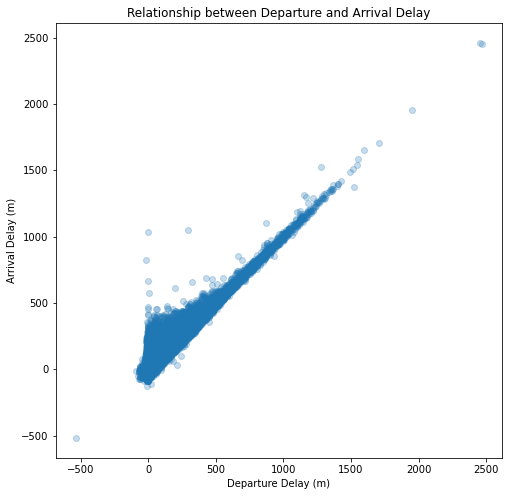

In [5]:
# Construct the plot
plt.figure(figsize = (8,8))
plt.scatter(data=df_total.query('Cancelled==0'),x='DepDelay',y='ArrDelay', alpha=1/4)
plt.title('Relationship between Departure and Arrival Delay')
plt.xlabel('Departure Delay (m)')
plt.ylabel('Arrival Delay (m)')

## (Delay behavior through different months, considering different types of delays and weights of variations )



In [6]:
#Generating df for each cancelation reason bymonth and determine the mean for each 
Carrier_month=df_total.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='CarrierDelay')
Weather_month=df_total.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='WeatherDelay')
Nas_month=df_total.query('NASDelay > 0').groupby('Month')['NASDelay'].mean().reset_index(name='NASDelay')
Security_month=df_total.query('SecurityDelay > 0').groupby('Month')['SecurityDelay'].mean().reset_index(name='SecurityDelay')
Aircraft_month=df_total.query('LateAircraftDelay > 0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay')


In [7]:
#Bring all of them in one df

Delays_month = Carrier_month.merge(Weather_month,on='Month')
Delays_month = Delays_month.merge(Nas_month,on='Month')
Delays_month = Delays_month.merge(Security_month,on='Month')
Delays_month = Delays_month.merge(Aircraft_month,on='Month')

No handles with labels found to put in legend.


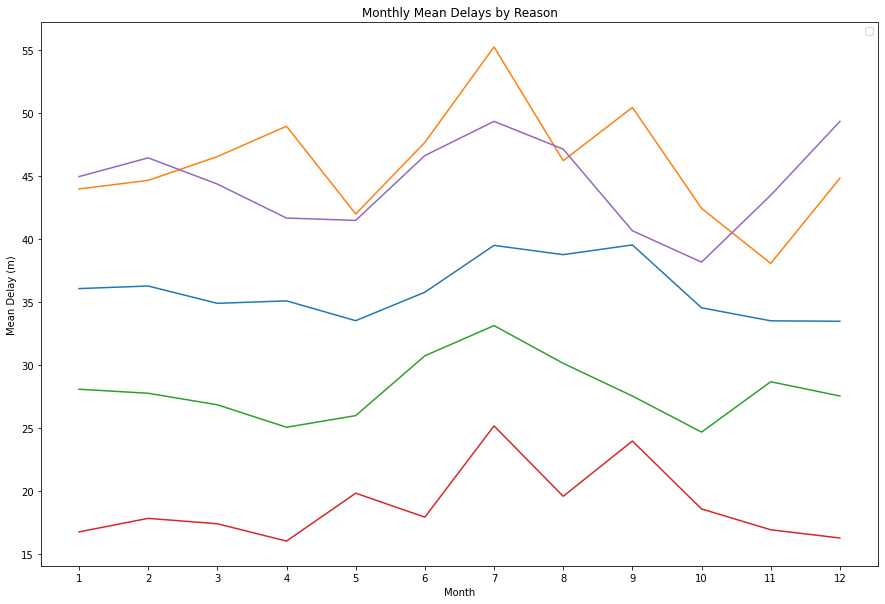

In [8]:
#construct the  line plot with defining error bars to display the variations 

plt.figure(figsize = (15,10))
plt.errorbar(x = Delays_month.Month, y = Delays_month.CarrierDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.WeatherDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.NASDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.SecurityDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.LateAircraftDelay)

plt.legend(loc='upper right')


plt.title('Monthly Mean Delays by Reason')
plt.xlabel('Month')
plt.ylabel('Mean Delay (m)')

plt.xticks(Delays_month.Month);

### Conclusions

It is evidently observed that weather related cancellations  were the most common type to cause flight performance disruptions. Additionally, the same happens with delays as the most causing factor for delays was weather conditions whereas the lowest was security reasons. The data showed that both arrival and departure delays have a linear relation which makes sense since they both under the same effect.


P.S I had a problem running the code for the data set since my device computational power is not sufficient for it.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!